# Análisis Manu Ginobili
 
### por Rodrigo Martin Alisón

Este es un breve analisis de las estadisticas de Emanuel Ginobili durante sus años de carrera en la NBA. Buscare encontrar algunas correlaciones entre sus números (minutos y partidos jugados) con su edad, asi como fueron evolucionando sus estadistintas en los rubros individuales. Finalmente intentare obtener la influencia de Emanuel en su equipo (San Antonio Spurs) analizando la cantidad de partidos ganados y perdidos con su presencia o sin la misma.

## Objetivos

Con el presente análisis buscare responder las siguientes preguntas:

1. Cual fue el promedio de puntos por partidos y por minutos jugados de Emanuel Ginobili durante su carrera en la NBA? Como se distribuyo durante sus diferentes temporadas?
2. Cual fue el promedio de minutos jugados durante su carrera en la NBA? Como se distribuyo durante sus diferentes temporadas?
3. Cual fue el porcentaje de partidos de titular que jugo? Fue variando en los distintos años?
4. Como evolucionaron sus estadisticas en los distintos rubros durante toda su carrera?
5. Como fueron los resultados del equipo con el en cancha o sin su presencia?


## Indice

1. <a href="#carga">Carga de datos</a>
2. <a href="#exploracion">Exploración</a>
3. <a href="#limpieza">Limpieza de datos</a>
4. <a href="#presentacion">Presentación de los datos</a>
5. <a href="#conclusiones">Conclusiones</a>
6. <a href="#referencias">Referencias</a>


## 1. Carga de Datos <a id="carga"></a>

In [500]:
#Importamos librerias 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns
import numpy as np

%matplotlib inline
sty.use('classic')


In [4]:
#Carga y lectura de archivos
path_games_details = "archivos/games_details.csv"
arc_games_details = pd.read_csv(path_games_details)

E:\win10\Alison\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
path_games = "archivos/games.csv"
arc_games = pd.read_csv(path_games)

## 2. Exploración <a id="exploracion"></a>

Comenzamos a analizar la información que trae cada archivo y tener mas conocimiento de los datos con que contamos.

In [6]:
arc_games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626111 entries, 0 to 626110
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            626111 non-null  int64  
 1   TEAM_ID            626111 non-null  int64  
 2   TEAM_ABBREVIATION  626111 non-null  object 
 3   TEAM_CITY          626111 non-null  object 
 4   PLAYER_ID          626111 non-null  int64  
 5   PLAYER_NAME        626111 non-null  object 
 6   NICKNAME           10485 non-null   object 
 7   START_POSITION     239375 non-null  object 
 8   COMMENT            102359 non-null  object 
 9   MIN                523751 non-null  object 
 10  FGM                523751 non-null  float64
 11  FGA                523751 non-null  float64
 12  FG_PCT             523751 non-null  float64
 13  FG3M               523751 non-null  float64
 14  FG3A               523751 non-null  float64
 15  FG3_PCT            523751 non-null  float64
 16  FT

In [ ]:
arc_games_details.sample(5)

In [ ]:
arc_games.info()

In [10]:
arc_games.sample(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
3916,2013-04-28,41200164,Final,1610612744,1610612743,2012,1610612744,115.0,0.557,0.696,...,27.0,29.0,1610612743,101.0,0.465,0.763,0.300,14.0,37.0,1
6199,2012-01-11,21100143,Final,1610612761,1610612758,2011,1610612761,91.0,0.425,0.810,...,20.0,44.0,1610612758,98.0,0.370,0.912,0.292,13.0,48.0,0
849,2020-12-31,22000067,Final,1610612760,1610612740,2020,1610612760,80.0,0.375,0.333,...,24.0,40.0,1610612740,113.0,0.484,0.632,0.361,23.0,58.0,0
14562,2005-12-04,20500242,Final,1610612757,1610612762,2005,1610612757,93.0,0.427,0.697,...,16.0,40.0,1610612762,98.0,0.530,0.828,0.400,22.0,30.0,0
13063,2006-12-12,20600311,Final,1610612745,1610612747,2006,1610612745,94.0,0.452,0.677,...,15.0,42.0,1610612747,102.0,0.476,0.778,0.364,27.0,38.0,0


## 3. Limpieza de datos <a id="limpieza"></a>

In [7]:
#Copia a archivos para trabajar en duplicado
arc_games_details_copia = arc_games_details.copy()
arc_games_copia = arc_games.copy()

In [8]:
#Hacemos el merge entre los archivos que vamos a usar
merge_games_gamesdetails = arc_games_details_copia.merge(arc_games_copia, on = ['GAME_ID'])

In [9]:
#Analizamos el dataset obtenido
merge_games_gamesdetails

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627521,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
627522,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
627523,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0
627524,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,21.0,40.0,1610612743,106.0,0.532,0.615,0.471,25.0,34.0,0


In [10]:
#Buscamos el id de San Antonio
merge_games_gamesdetails.loc[merge_games_gamesdetails["TEAM_ABBREVIATION"] == 'SAS',["TEAM_ID"]].head(1)

,TEAM_ID
339,1610612759


In [11]:
#Una vez conocido el ID de SAS, filtramos el dataset de games_details para quedarnos solo con los datos de SAS. Lo guardamos en un nuevo dataset
df_SAS = arc_games_copia.loc[(arc_games_copia ["HOME_TEAM_ID"] == 1610612759) | (arc_games_copia ["VISITOR_TEAM_ID"] == 1610612759)] 

In [12]:
#Analizamos el dataset de SAS
df_SAS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769 entries, 13 to 24971
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     1769 non-null   object 
 1   GAME_ID           1769 non-null   int64  
 2   GAME_STATUS_TEXT  1769 non-null   object 
 3   HOME_TEAM_ID      1769 non-null   int64  
 4   VISITOR_TEAM_ID   1769 non-null   int64  
 5   SEASON            1769 non-null   int64  
 6   TEAM_ID_home      1769 non-null   int64  
 7   PTS_home          1761 non-null   float64
 8   FG_PCT_home       1761 non-null   float64
 9   FT_PCT_home       1761 non-null   float64
 10  FG3_PCT_home      1761 non-null   float64
 11  AST_home          1761 non-null   float64
 12  REB_home          1761 non-null   float64
 13  TEAM_ID_away      1769 non-null   int64  
 14  PTS_away          1761 non-null   float64
 15  FG_PCT_away       1761 non-null   float64
 16  FT_PCT_away       1761 non-null   float6

In [14]:
#Seleccionamos las columnas que nos queremos quedar del dataset de SAS
df_SAS = df_SAS[["GAME_DATE_EST","GAME_ID","HOME_TEAM_ID","VISITOR_TEAM_ID","SEASON","HOME_TEAM_WINS"]]

In [15]:
#Tomamos el dataset con el merge original y filtramos el dataset de merge_games_details para quedarnos solo con los datos de Manu Ginobili. Lo guardamos en un nuevo dataset
df_manu = merge_games_gamesdetails.loc[merge_games_gamesdetails["PLAYER_NAME"] == "Manu Ginobili"] 

In [45]:
#Analizamos el dataset que contiene los datos de Manu Ginobili
df_manu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 69945 to 626666
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            1292 non-null   int64  
 1   TEAM_ID            1292 non-null   int64  
 2   TEAM_ABBREVIATION  1292 non-null   object 
 3   TEAM_CITY          1292 non-null   object 
 4   PLAYER_ID          1292 non-null   int64  
 5   PLAYER_NAME        1292 non-null   object 
 6   NICKNAME           0 non-null      object 
 7   START_POSITION     397 non-null    object 
 8   COMMENT            57 non-null     object 
 9   MIN                1235 non-null   object 
 10  FGM                1235 non-null   float64
 11  FGA                1235 non-null   float64
 12  FG_PCT             1235 non-null   float64
 13  FG3M               1235 non-null   float64
 14  FG3A               1235 non-null   float64
 15  FG3_PCT            1235 non-null   float64
 16  FTM               

In [270]:
#Creamos una funcion que nos indique las etapas de la carrera de Manu

def etapas(temporada):
    if temporada == 2003:
        return "2003 - Rookie"
    elif temporada == 2004: 
        return "2004 - Sophomore"
    elif temporada < 2013: 
        return "2005 a 2012 - Media"
    else: 
        return "2013 a 2017 - Senior"

In [271]:
#Agregamos la columna Etapa usando la funcion creada

df_manu['Etapa'] = df_manu.apply(lambda x: etapas(x["SEASON"]),axis=1)

In [272]:
df_manu[["SEASON","Etapa"]]

,SEASON,Etapa
0,2003,2003 - Rookie
1,2003,2003 - Rookie
2,2003,2003 - Rookie
3,2003,2003 - Rookie
4,2003,2003 - Rookie
...,...,...
1287,2017,2013 a 2017 - Senior
1288,2017,2013 a 2017 - Senior
1289,2017,2013 a 2017 - Senior
1290,2017,2013 a 2017 - Senior


In [19]:
#Creamos una funcion que nos indique la estacion del año en la que se realizó el partido

def estacion(mes):
    if mes == 12 or mes == 1 or mes == 2:
        return "Invierno"
    elif mes == 3 or mes == 4 or mes == 5:
        return "Primavera"
    elif mes == 6 or mes == 7 or mes == 8:
        return "Verano"
    else:     
        return "Otoño"

In [20]:
df_manu[['año','mes','dia']] = df_manu['GAME_DATE_EST'].str.split('-', 2, expand = True)

E:\win10\Alison\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_manu[['año','mes','dia']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 69945 to 626666
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   año     1292 non-null   object
 1   mes     1292 non-null   object
 2   dia     1292 non-null   object
dtypes: object(3)
memory usage: 40.4+ KB


In [22]:
df_manu["mes"] = df_manu["mes"].astype("int")

<ipython-input-22-ef95e4efdd64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manu["mes"] = df_manu["mes"].astype("int")


In [23]:
df_manu[['año','mes','dia']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 69945 to 626666
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   año     1292 non-null   object
 1   mes     1292 non-null   int32 
 2   dia     1292 non-null   object
dtypes: int32(1), object(2)
memory usage: 35.3+ KB


In [24]:
df_manu['mes']

69945      4
70304      4
70676      3
71026      3
71422      3
          ..
623704    11
624040    11
625682    10
625855    10
626666    10
Name: mes, Length: 1292, dtype: int32

In [25]:
df_manu['Estacion'] = df_manu.apply(lambda x: estacion(x["mes"]),axis=1)

<ipython-input-25-b893d92caa15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manu['Estacion'] = df_manu.apply(lambda x: estacion(x["mes"]),axis=1)


In [26]:
df_manu['Estacion'].sample(30)

307222     Invierno
445522    Primavera
477153        Otoño
271122    Primavera
449809    Primavera
203022    Primavera
552614        Otoño
359356        Otoño
615869     Invierno
70676     Primavera
158408     Invierno
511837        Otoño
349224     Invierno
591789    Primavera
238658    Primavera
446652    Primavera
561808    Primavera
459205     Invierno
604254     Invierno
523950    Primavera
490135    Primavera
435182        Otoño
603954     Invierno
541615     Invierno
527824    Primavera
171450    Primavera
343353     Invierno
450177    Primavera
228658     Invierno
583965        Otoño
Name: Estacion, dtype: object

In [27]:
#Ordenamos el Dataset por temporada
df_manu = df_manu.sort_values(by = ["SEASON"])

In [28]:
#Reseteamos el indice
df_manu = df_manu.reset_index()

In [29]:
df_manu

,index,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,Etapa,año,mes,dia,Estacion
0,249058,20300689,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.600,0.250,15.0,40.0,0,Principante,2004,2,02,Invierno
1,241187,20301020,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.643,0.167,28.0,48.0,1,Principante,2004,3,23,Primavera
2,241652,20301001,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.929,0.429,17.0,31.0,1,Principante,2004,3,20,Primavera
3,241985,20300985,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.846,0.222,15.0,37.0,1,Principante,2004,3,18,Primavera
4,242426,20300965,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.759,0.364,14.0,37.0,1,Principante,2004,3,15,Primavera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,432808,21700323,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.688,0.407,20.0,43.0,0,Senior,2017,12,01,Invierno
1288,433225,21700311,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.875,0.500,21.0,37.0,1,Senior,2017,11,29,Otoño
1289,433530,21700295,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.706,0.438,25.0,40.0,1,Senior,2017,11,27,Otoño
1290,434622,21700250,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,NaN,...,0.375,0.267,21.0,38.0,1,Senior,2017,11,20,Otoño


In [30]:
#Completamos los valores nulos de la columna MIN
df_manu[["MIN"]] = df_manu[["MIN"]].fillna(0)

In [31]:
#Subdividmos la columna MIN debido al formato ", y creamos las columnas minutos y segundos 
df_manu[['minutos','segundos']] = df_manu['MIN'].str.split(':', 1, expand = True)

In [32]:
#Verificamos si hay valores nulos en mintutos
df_manu.loc[df_manu["minutos"].isnull()]

,index,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,AST_away,REB_away,HOME_TEAM_WINS,Etapa,año,mes,dia,Estacion,minutos,segundos
94,206623,20401145,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DND - Stomach Virus,...,24.0,59.0,0,Principante,2005,4,10,Primavera,NaN,NaN
99,211012,20400966,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DND - Strained Right Groin,...,13.0,49.0,1,Principante,2005,3,18,Primavera,NaN,NaN
100,211372,20400951,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DND - Strained right groin,...,14.0,44.0,1,Principante,2005,3,16,Primavera,NaN,NaN
101,211734,20400935,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DND - strained right groin,...,21.0,37.0,1,Principante,2005,3,14,Primavera,NaN,NaN
102,212094,20400918,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DND - slight right groin strain,...,14.0,38.0,0,Principante,2005,3,12,Primavera,NaN,NaN
103,212487,20400900,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DND - Right Groin Tightness,...,15.0,37.0,1,Principante,2005,3,09,Primavera,NaN,NaN
179,220890,20400550,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DND - right quadricep contusion,...,16.0,37.0,1,Principante,2005,1,17,Invierno,NaN,NaN
187,223931,20400420,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DND-strained neck,...,34.0,49.0,0,Principante,2004,12,30,Invierno,NaN,NaN
218,176180,20500978,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DNP - Calf/quad contusion,...,19.0,37.0,0,Principante,2006,3,18,Primavera,NaN,NaN
278,171450,20501175,1610612759,SAS,San Antonio,1938,Manu Ginobili,NaN,NaN,DNP - Coach's Decision,...,15.0,39.0,0,Principante,2006,4,13,Primavera,NaN,NaN


In [33]:
# Completamos los valores nulos de minutos y segundos y transformamos las columnas a float
df_manu[["minutos"]] = df_manu[["minutos"]].fillna(0)
df_manu[["segundos"]] = df_manu[["segundos"]].fillna(0)
df_manu[["minutos"]] = df_manu[["minutos"]].astype(float).round(2)
df_manu[["segundos"]] = df_manu[["segundos"]].astype(float).round(2)

In [34]:
df_manu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1292 non-null   int64  
 1   GAME_ID            1292 non-null   int64  
 2   TEAM_ID            1292 non-null   int64  
 3   TEAM_ABBREVIATION  1292 non-null   object 
 4   TEAM_CITY          1292 non-null   object 
 5   PLAYER_ID          1292 non-null   int64  
 6   PLAYER_NAME        1292 non-null   object 
 7   NICKNAME           0 non-null      object 
 8   START_POSITION     397 non-null    object 
 9   COMMENT            57 non-null     object 
 10  MIN                1292 non-null   object 
 11  FGM                1235 non-null   float64
 12  FGA                1235 non-null   float64
 13  FG_PCT             1235 non-null   float64
 14  FG3M               1235 non-null   float64
 15  FG3A               1235 non-null   float64
 16  FG3_PCT            1235 

In [281]:
df_manu["edad"] = df_manu["SEASON"] - 1977

In [294]:
df_manu[["START_POSITION"]] = df_manu[["START_POSITION"]].fillna("Supl")

In [295]:
df_manu["START_POSITION"].unique()

array(['Supl', 'G', 'F'], dtype=object)

In [35]:
df_manu.loc[df_manu["minutos"].isnull()]

,index,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,AST_away,REB_away,HOME_TEAM_WINS,Etapa,año,mes,dia,Estacion,minutos,segundos


In [36]:
#Creamos un dataframe para almacenar las estadisticas que queremos
df = pd.DataFrame()

In [37]:
#Calculamos los puntos por temporada
pts_x_temp = df_manu.groupby("SEASON")["PTS"].sum()

In [38]:
df["PTS_X_TEMP"] = df_manu.groupby("SEASON")["PTS"].sum()

In [136]:
df

,PTS_X_TEMP
SEASON,
2003,1117.0
2004,1688.0
2005,1277.0
2006,1614.0
2007,1818.0
2008,683.0
2009,1456.0
2010,1538.0
2011,662.0


In [39]:
#Calculamos los partidos por temporada, usando la columna PTS que solo contiene datos los partidos jugados
partidos_x_temp = df_manu.groupby("SEASON")["PTS"].count()

In [40]:
df["GAMES_X_TEMP"] = partidos_x_temp

In [139]:
df

,PTS_X_TEMP,GAMES_X_TEMP
SEASON,,
2003,1117.0,87
2004,1688.0,100
2005,1277.0,85
2006,1614.0,99
2007,1818.0,95
2008,683.0,44
2009,1456.0,89
2010,1538.0,90
2011,662.0,50


In [41]:
#Controlamos que PTS solo tenga datos los partidos en que jugo
df_manu["PTS"].count()

1235

In [109]:
#Calculamos el promedio de puntos por partido por temporada
promedio_pts_x_temp = df_manu.groupby("SEASON")["PTS"].sum() / df_manu.groupby("SEASON")["PTS"].count()

In [110]:
df["PROM_PTS_X_TEMP"] = promedio_pts_x_temp.round(2)

In [143]:
df

,PTS_X_TEMP,GAMES_X_TEMP,PROM_PTS_X_TEMP
SEASON,,,
2003,1117.0,87,12.839080
2004,1688.0,100,16.880000
2005,1277.0,85,15.023529
2006,1614.0,99,16.303030
2007,1818.0,95,19.136842
2008,683.0,44,15.522727
2009,1456.0,89,16.359551
2010,1538.0,90,17.088889
2011,662.0,50,13.240000


In [241]:
#Calculamos los minutos jugados por cada temporada, solo usando la columna minutos
min_x_temp = df_manu.groupby("SEASON")["minutos"].sum()

#Calculamos los segundos jugados por temporada, usando la columna segundos 
segundos_x_temp = df_manu.groupby("SEASON")["segundos"].sum()

#Calculamos los minutos mas los segundos jugados por temporada
minutos_x_temp = df_manu.groupby("SEASON")["minutos"].sum() + (df_manu.groupby("SEASON")["segundos"].sum() / 60)

In [242]:
df["MIN_X_TEMP"] = minutos_x_temp.round(2)

In [336]:
df

,PTS_X_TEMP,GAMES_X_TEMP,PROM_PTS_X_TEMP,MIN_X_TEMP,PROM_MIX_X_TEMP,PART_TITULAR,PORC_PART_TITULAR,PROM_REB_X_TEMP,PROM_AST_X_TEMP,PROM_TAPAS_X_TEMP,PROM_ROBOS_X_TEMP,PROM_PERD_X_TEMP,PROM_MIN_X_TEMP,PROM_PTS_X_MIN_X_TEMP
SEASON,,,,,,,,,,,,,,
2003,1117.0,87,12.84,2533.90,29.13,38,43.68,4.56,3.70,0.20,1.76,2.09,29.13,0.44
2004,1688.0,100,16.88,2992.30,29.92,89,89.00,4.76,3.99,0.34,1.55,2.45,29.92,0.56
2005,1277.0,85,15.02,2387.13,28.08,67,78.82,3.65,3.42,0.44,1.48,2.02,28.08,0.53
2006,1614.0,99,16.30,2737.65,27.65,36,36.36,4.49,3.49,0.31,1.44,2.07,27.65,0.59
2007,1818.0,95,19.14,2955.90,31.11,29,30.53,4.54,4.38,0.41,1.27,2.71,31.11,0.62
2008,683.0,44,15.52,1180.73,26.83,7,15.91,4.50,3.57,0.36,1.45,2.00,26.83,0.58
2009,1456.0,89,16.36,2579.33,28.98,31,34.83,3.71,4.96,0.29,1.48,2.12,28.98,0.56
2010,1538.0,90,17.09,2696.85,29.96,84,93.33,3.62,4.81,0.36,1.54,2.20,29.96,0.57
2011,662.0,50,13.24,1227.33,24.55,9,18.00,3.40,4.22,0.32,0.72,2.22,24.55,0.54


In [46]:
#Calculamos los minutos por partido por temporada jugados
promedio_min_x_temp = (df_manu.groupby("SEASON")["minutos"].sum() + (df_manu.groupby("SEASON")["segundos"].sum() / 60)
)  / df_manu.groupby("SEASON")["PTS"].count()

In [230]:
df["PROM_MIN_X_TEMP"] = promedio_min_x_temp.round(2)

In [156]:
df

,PTS_X_TEMP,GAMES_X_TEMP,PROM_PTS_X_TEMP,MIN_X_TEMP,PROM_MIX_X_TEMP
SEASON,,,,,
2003,1117.0,87,12.84,2533.90,29.13
2004,1688.0,100,16.88,2992.30,29.92
2005,1277.0,85,15.02,2387.13,28.08
2006,1614.0,99,16.30,2737.65,27.65
2007,1818.0,95,19.14,2955.90,31.11
2008,683.0,44,15.52,1180.73,26.83
2009,1456.0,89,16.36,2579.33,28.98
2010,1538.0,90,17.09,2696.85,29.96
2011,662.0,50,13.24,1227.33,24.55


In [238]:
prom_pts_x_min_x_temp = df_manu.groupby("SEASON")["PTS"].sum() / (df_manu.groupby("SEASON")["minutos"].sum() + (df_manu.groupby("SEASON")["segundos"].sum() / 60))

In [239]:
df["PROM_PTS_X_MIN_X_TEMP"] = prom_pts_x_min_x_temp.round(2)

In [240]:
df

,PTS_X_TEMP,GAMES_X_TEMP,PROM_PTS_X_TEMP,MIN_X_TEMP,PROM_MIX_X_TEMP,PART_TITULAR,PORC_PART_TITULAR,PROM_REB_X_TEMP,PROM_AST_X_TEMP,PROM_TAPAS_X_TEMP,PROM_ROBOS_X_TEMP,PROM_PERD_X_TEMP,PROM_MIN_X_TEMP,PROM_PTS_X_MIN_X_TEMP
SEASON,,,,,,,,,,,,,,
2003,1117.0,87,12.84,2533.90,29.13,38,43.68,4.56,3.70,0.20,1.76,2.09,29.13,0.44
2004,1688.0,100,16.88,2992.30,29.92,89,89.00,4.76,3.99,0.34,1.55,2.45,29.92,0.56
2005,1277.0,85,15.02,2387.13,28.08,67,78.82,3.65,3.42,0.44,1.48,2.02,28.08,0.53
2006,1614.0,99,16.30,2737.65,27.65,36,36.36,4.49,3.49,0.31,1.44,2.07,27.65,0.59
2007,1818.0,95,19.14,2955.90,31.11,29,30.53,4.54,4.38,0.41,1.27,2.71,31.11,0.62
2008,683.0,44,15.52,1180.73,26.83,7,15.91,4.50,3.57,0.36,1.45,2.00,26.83,0.58
2009,1456.0,89,16.36,2579.33,28.98,31,34.83,3.71,4.96,0.29,1.48,2.12,28.98,0.56
2010,1538.0,90,17.09,2696.85,29.96,84,93.33,3.62,4.81,0.36,1.54,2.20,29.96,0.57
2011,662.0,50,13.24,1227.33,24.55,9,18.00,3.40,4.22,0.32,0.72,2.22,24.55,0.54


In [49]:
#Calculamos los partidos jugados de titular
part_titular = df_manu.groupby("SEASON")["START_POSITION"].count()

In [50]:
df["PART_TITULAR"] = part_titular

In [111]:
df

,PTS_X_TEMP,GAMES_X_TEMP,PROM_PTS_X_TEMP,MIN_X_TEMP,PROM_MIX_X_TEMP,PROM_PTS_X_MIN_X_TEMP,PART_TITULAR
SEASON,,,,,,,
2003,1117.0,87,12.839080,2533.900000,29.125287,0.440822,38
2004,1688.0,100,16.880000,2992.300000,29.923000,0.564115,89
2005,1277.0,85,15.023529,2387.133333,28.083922,0.534951,67
2006,1614.0,99,16.303030,2737.650000,27.653030,0.589557,36
2007,1818.0,95,19.136842,2955.900000,31.114737,0.615041,29
2008,683.0,44,15.522727,1180.733333,26.834848,0.578454,7
2009,1456.0,89,16.359551,2579.333333,28.981273,0.564487,31
2010,1538.0,90,17.088889,2696.850000,29.965000,0.570295,84
2011,662.0,50,13.240000,1227.333333,24.546667,0.539381,9


In [52]:
#Calculamos el porcentaje de partidos jugados de titular
porc_part_titular = (df_manu.groupby("SEASON")["START_POSITION"].count() * 100) / df_manu.groupby("SEASON")["PTS"].count()

In [53]:
df["PORC_PART_TITULAR"] = porc_part_titular.round(2)

In [164]:
df

,PTS_X_TEMP,GAMES_X_TEMP,PROM_PTS_X_TEMP,MIN_X_TEMP,PROM_MIX_X_TEMP,PROM_PTS_X_MIN_X_TEMP,PART_TITULAR,PORC_PART_TITULAR
SEASON,,,,,,,,
2003,1117.0,87,12.84,2533.90,29.13,0.44,38,43.68
2004,1688.0,100,16.88,2992.30,29.92,0.56,89,89.00
2005,1277.0,85,15.02,2387.13,28.08,0.53,67,78.82
2006,1614.0,99,16.30,2737.65,27.65,0.59,36,36.36
2007,1818.0,95,19.14,2955.90,31.11,0.62,29,30.53
2008,683.0,44,15.52,1180.73,26.83,0.58,7,15.91
2009,1456.0,89,16.36,2579.33,28.98,0.56,31,34.83
2010,1538.0,90,17.09,2696.85,29.96,0.57,84,93.33
2011,662.0,50,13.24,1227.33,24.55,0.54,9,18.00


In [54]:
promedio_reb_x_temp = df_manu.groupby("SEASON")["REB"].sum() / df_manu.groupby("SEASON")["PTS"].count()
promedio_ast_x_temp = df_manu.groupby("SEASON")["AST"].sum() / df_manu.groupby("SEASON")["PTS"].count()
promedio_blk_x_temp = df_manu.groupby("SEASON")["BLK"].sum() / df_manu.groupby("SEASON")["PTS"].count()
promedio_stl_x_temp = df_manu.groupby("SEASON")["STL"].sum() / df_manu.groupby("SEASON")["PTS"].count()
promedio_to_x_temp = df_manu.groupby("SEASON")["TO"].sum() / df_manu.groupby("SEASON")["PTS"].count()

In [55]:
df["PROM_REB_X_TEMP"] = promedio_reb_x_temp.round(2)
df["PROM_AST_X_TEMP"] = promedio_ast_x_temp.round(2)
df["PROM_TAPAS_X_TEMP"] = promedio_blk_x_temp.round(2)
df["PROM_ROBOS_X_TEMP"] = promedio_stl_x_temp.round(2)
df["PROM_PERD_X_TEMP"] = promedio_to_x_temp.round(2)

In [64]:
df

,PTS_X_TEMP,GAMES_X_TEMP,PROM_PTS_X_TEMP,MIN_X_TEMP,PROM_MIX_X_TEMP,PART_TITULAR,PORC_PART_TITULAR,PROM_REB_X_TEMP,PROM_AST_X_TEMP,PROM_TAPAS_X_TEMP,PROM_ROBOS_X_TEMP,PROM_PERD_X_TEMP
SEASON,,,,,,,,,,,,
2003,1117.0,87,12.84,2533.90,29.13,38,43.68,4.56,3.70,0.20,1.76,2.09
2004,1688.0,100,16.88,2992.30,29.92,89,89.00,4.76,3.99,0.34,1.55,2.45
2005,1277.0,85,15.02,2387.13,28.08,67,78.82,3.65,3.42,0.44,1.48,2.02
2006,1614.0,99,16.30,2737.65,27.65,36,36.36,4.49,3.49,0.31,1.44,2.07
2007,1818.0,95,19.14,2955.90,31.11,29,30.53,4.54,4.38,0.41,1.27,2.71
2008,683.0,44,15.52,1180.73,26.83,7,15.91,4.50,3.57,0.36,1.45,2.00
2009,1456.0,89,16.36,2579.33,28.98,31,34.83,3.71,4.96,0.29,1.48,2.12
2010,1538.0,90,17.09,2696.85,29.96,84,93.33,3.62,4.81,0.36,1.54,2.20
2011,662.0,50,13.24,1227.33,24.55,9,18.00,3.40,4.22,0.32,0.72,2.22


In [62]:
df_SAS_manu = df_SAS.loc[df_SAS["SEASON"] < 2018]

In [63]:
df_SAS_manu

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS
2431,2014-06-15,41300405,1610612759,1610612748,2013,1
2432,2014-06-12,41300404,1610612748,1610612759,2013,0
2433,2014-06-10,41300403,1610612748,1610612759,2013,0
2434,2014-06-08,41300402,1610612759,1610612748,2013,0
2435,2014-06-05,41300401,1610612759,1610612748,2013,1
...,...,...,...,...,...,...
24921,2014-10-24,11400113,1610612745,1610612759,2014,1
24934,2014-10-22,11400105,1610612759,1610612737,2014,0
24949,2014-10-20,11400091,1610612759,1610612758,2014,1
24958,2014-10-18,11400078,1610612759,1610612748,2014,0


In [61]:
df_SAS

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS
13,2021-11-16,22100212,1610612746,1610612759,2021,1
25,2021-11-14,22100192,1610612747,1610612759,2021,1
46,2021-11-12,22100181,1610612759,1610612742,2021,0
61,2021-11-10,22100166,1610612759,1610612758,2021,1
82,2021-11-07,22100144,1610612760,1610612759,2021,1
...,...,...,...,...,...,...
24921,2014-10-24,11400113,1610612745,1610612759,2014,1
24934,2014-10-22,11400105,1610612759,1610612737,2014,0
24949,2014-10-20,11400091,1610612759,1610612758,2014,1
24958,2014-10-18,11400078,1610612759,1610612748,2014,0


In [59]:
df_estad_SAS = pd.DataFrame()

In [60]:
df_estad_SAS["PART_JUGADOS"] = df_SAS_manu.groupby("SEASON")["GAME_ID"].count()

NameError: name 'df_SAS_manu' is not defined

In [65]:
df_estad_SAS

""


In [66]:
partidos_ganados_local = df_SAS_manu.loc[(df_SAS_manu["HOME_TEAM_ID"] == 1610612759) & (df_SAS_manu["HOME_TEAM_WINS"] == 1)].groupby("SEASON")["GAME_ID"].count()

In [67]:
df_estad_SAS["PART_GAN_LOCAL"] = partidos_ganados_local

In [68]:
df_estad_SAS

,PART_GAN_LOCAL
SEASON,
2003,37
2004,49
2005,39
2006,42
2007,43
2008,30
2009,33
2010,40
2011,35


In [69]:
partidos_ganados_vis = df_SAS_manu.loc[(df_SAS_manu["VISITOR_TEAM_ID"] == 1610612759) & (arc_games_copia["HOME_TEAM_WINS"] == 0)].groupby("SEASON")["GAME_ID"].count()

In [70]:
df_estad_SAS["PART_GAN_VIS"] = partidos_ganados_vis

In [73]:
df_estad_SAS

,PART_GAN_LOCAL,PART_GAN_VIS
SEASON,,
2003,37,29
2004,49,29
2005,39,32
2006,42,34
2007,43,25
2008,30,28
2009,33,24
2010,40,26
2011,35,26


In [72]:
partidos_perdidos_local = df_SAS_manu.loc[(df_SAS_manu["HOME_TEAM_ID"] == 1610612759) & (df_SAS_manu["HOME_TEAM_WINS"] == 0)].groupby("SEASON")["GAME_ID"].count()
partidos_perdidos_vis = df_SAS_manu.loc[(df_SAS_manu["VISITOR_TEAM_ID"] == 1610612759) & (df_SAS_manu["HOME_TEAM_WINS"] == 1)].groupby("SEASON")["GAME_ID"].count()

In [74]:
df_estad_SAS["PART_PER_LOC"] = partidos_perdidos_local
df_estad_SAS["PART_PER_VIS"] = partidos_perdidos_vis

In [185]:
df_estad_SAS

,PART_JUGADOS,PART_GAN_LOCAL,PART_GAN_VIS,PART_PER_LOC,PART_PER_VIS
SEASON,,,,,
2003,100,37,29,14,20
2004,108,49,29,6,24
2005,103,39,32,13,19
2006,107,42,34,14,17
2007,104,43,25,8,28
2008,94,30,28,18,18
2009,98,33,24,16,25
2010,94,40,26,7,21
2011,82,35,26,6,15


In [439]:
df_SAS_con_Manu = pd.DataFrame()

In [440]:
df_SAS_con_Manu["PART_JUGADOS"] = df_manu.groupby("SEASON")["PTS"].count()
df_SAS_con_Manu["PART_GAN_LOCAL"] = df_manu.loc[(df_manu["HOME_TEAM_ID"] == 1610612759) & (df_manu["HOME_TEAM_WINS"] == 1)].groupby("SEASON")["PTS"].count()
df_SAS_con_Manu["PART_GAN_VIS"] = df_manu.loc[(df_manu["VISITOR_TEAM_ID"] == 1610612759) & (df_manu["HOME_TEAM_WINS"] == 0)].groupby("SEASON")["PTS"].count()
df_SAS_con_Manu["PART_PER_LOC"] = df_manu.loc[(df_manu["HOME_TEAM_ID"] == 1610612759) & (df_manu["HOME_TEAM_WINS"] == 0)].groupby("SEASON")["PTS"].count()
df_SAS_con_Manu["PART_PER_VIS"] = df_manu.loc[(df_manu["VISITOR_TEAM_ID"] == 1610612759) & (df_manu["HOME_TEAM_WINS"] == 1)].groupby("SEASON")["PTS"].count()

In [441]:
df_SAS_con_Manu

,PART_JUGADOS,PART_GAN_LOCAL,PART_GAN_VIS,PART_PER_LOC,PART_PER_VIS
SEASON,,,,,
2003,87,35,24,9,19
2004,100,45,27,5,23
2005,85,32,27,11,15
2006,99,41,33,12,13
2007,95,38,24,7,26
2008,44,16,16,4,8
2009,89,29,22,15,23
2010,90,40,26,5,19
2011,50,24,15,4,7


## 4. Presentación de los Datos <a id="presentacion"></a>

Comenzaremos a responder las preguntas planteadas como objetivos del proyecto:

#### 1 - Cuál fue el promedio de puntos por partidos y por minutos jugados de Emanuel Ginobili durante su carrera en la NBA? Como se distribuyo durante sus diferentes temporadas?

In [233]:
df

,PTS_X_TEMP,GAMES_X_TEMP,PROM_PTS_X_TEMP,MIN_X_TEMP,PROM_MIX_X_TEMP,PART_TITULAR,PORC_PART_TITULAR,PROM_REB_X_TEMP,PROM_AST_X_TEMP,PROM_TAPAS_X_TEMP,PROM_ROBOS_X_TEMP,PROM_PERD_X_TEMP,PROM_MIN_X_TEMP
SEASON,,,,,,,,,,,,,
2003,1117.0,87,12.84,2533.90,29.13,38,43.68,4.56,3.70,0.20,1.76,2.09,29.13
2004,1688.0,100,16.88,2992.30,29.92,89,89.00,4.76,3.99,0.34,1.55,2.45,29.92
2005,1277.0,85,15.02,2387.13,28.08,67,78.82,3.65,3.42,0.44,1.48,2.02,28.08
2006,1614.0,99,16.30,2737.65,27.65,36,36.36,4.49,3.49,0.31,1.44,2.07,27.65
2007,1818.0,95,19.14,2955.90,31.11,29,30.53,4.54,4.38,0.41,1.27,2.71,31.11
2008,683.0,44,15.52,1180.73,26.83,7,15.91,4.50,3.57,0.36,1.45,2.00,26.83
2009,1456.0,89,16.36,2579.33,28.98,31,34.83,3.71,4.96,0.29,1.48,2.12,28.98
2010,1538.0,90,17.09,2696.85,29.96,84,93.33,3.62,4.81,0.36,1.54,2.20,29.96
2011,662.0,50,13.24,1227.33,24.55,9,18.00,3.40,4.22,0.32,0.72,2.22,24.55


In [234]:
df[["PROM_PTS_X_TEMP"]]

,PROM_PTS_X_TEMP
SEASON,
2003,12.84
2004,16.88
2005,15.02
2006,16.30
2007,19.14
2008,15.52
2009,16.36
2010,17.09
2011,13.24


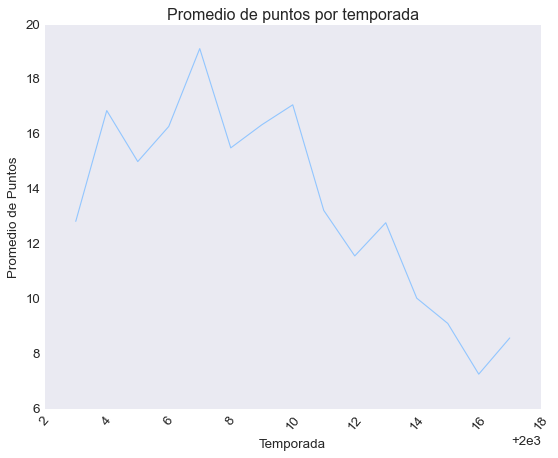

In [496]:
pregunta1a = df[["PROM_PTS_X_TEMP"]]
pregunta1a = pregunta1a.plot(legend = False)
plt.title("Promedio de puntos por temporada")
plt.ylabel('Promedio de Puntos')
plt.xticks(rotation=50)
plt.xlabel('Temporada');

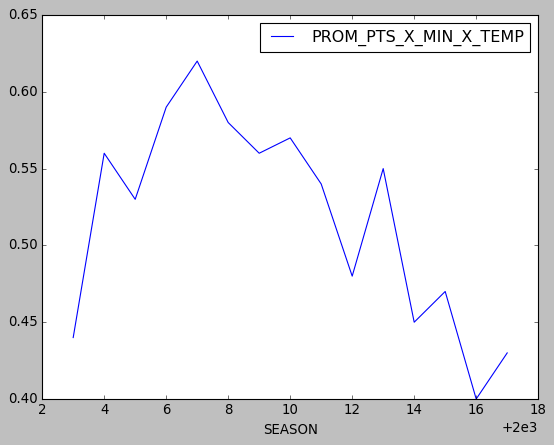

In [245]:
pregunta1b = df[["PROM_PTS_X_MIN_X_TEMP"]].plot()

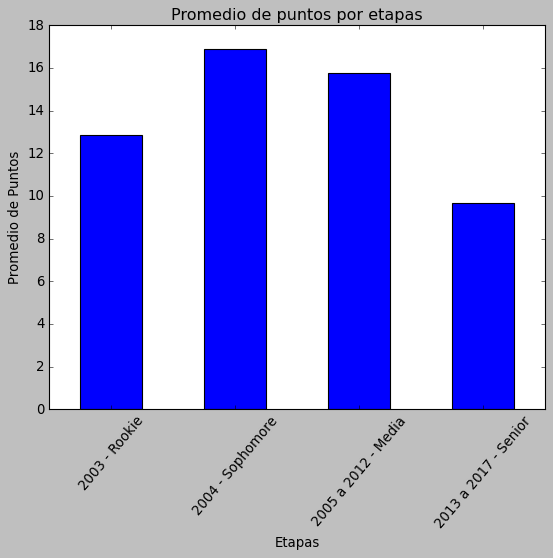

In [280]:
pregunta1c = df_manu.groupby("Etapa")["PTS"].sum() / df_manu.groupby("Etapa")["PTS"].count()
pregunta1c = pregunta1c.plot.bar()
plt.title("Promedio de puntos por etapas")
plt.ylabel('Promedio de Puntos')
plt.xticks(rotation=50);
plt.xlabel('Etapas');

In [278]:
pregunta1c.to_frame().reset_index()

,Etapa,PTS
0,2003 - Rookie,12.839080
1,2004 - Sophomore,16.880000
2,2005 a 2012 - Media,15.756289
3,2013 a 2017 - Senior,9.652913


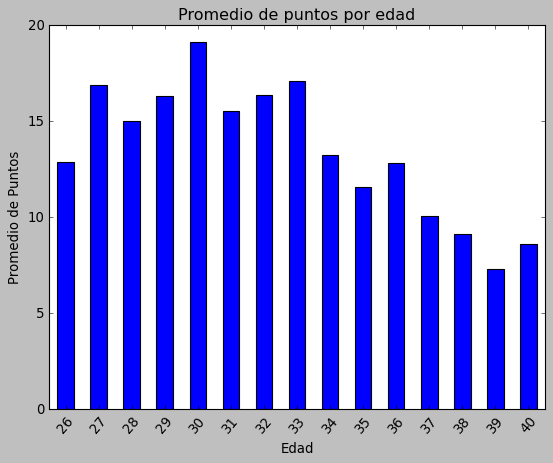

In [284]:
pregunta1d = df_manu.groupby("edad")["PTS"].sum() / df_manu.groupby("edad")["PTS"].count()
pregunta1d = pregunta1d.plot.bar()
plt.title("Promedio de puntos por edad")
plt.ylabel('Promedio de Puntos')
plt.xticks(rotation=50);
plt.xlabel('Edad');

#### 2. Cúal fue el promedio de minutos jugados durante su carrera en la NBA? Como se distribuyo durante sus diferentes temporadas?

In [246]:
df["PROM_MIN_X_TEMP"]

SEASON
2003    29.13
2004    29.92
2005    28.08
2006    27.65
2007    31.11
2008    26.83
2009    28.98
2010    29.96
2011    24.55
2012    23.91
2013    23.23
2014    22.21
2015    19.24
2016    18.36
2017    19.84
Name: PROM_MIN_X_TEMP, dtype: float64

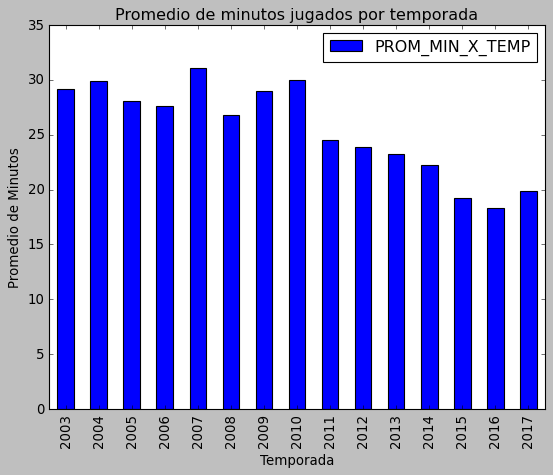

In [250]:
pregunta2 = df[["PROM_MIN_X_TEMP"]].plot.bar()
plt.title('Promedio de minutos jugados por temporada')
plt.ylabel('Promedio de Minutos')
plt.xlabel('Temporada');

In [498]:
df[["PROM_PTS_X_MIN_X_TEMP"]]

,PROM_PTS_X_MIN_X_TEMP
SEASON,
2003,0.44
2004,0.56
2005,0.53
2006,0.59
2007,0.62
2008,0.58
2009,0.56
2010,0.57
2011,0.54


#### 3. Cuál fue el porcentaje de partidos de titular que jugo? Fue variando en los distintos años?

In [337]:
df["PORC_PART_TITULAR"]

SEASON
2003    43.68
2004    89.00
2005    78.82
2006    36.36
2007    30.53
2008    15.91
2009    34.83
2010    93.33
2011    18.00
2012     3.57
2013     3.16
2014     0.00
2015     0.00
2016     1.12
2017     0.00
Name: PORC_PART_TITULAR, dtype: float64

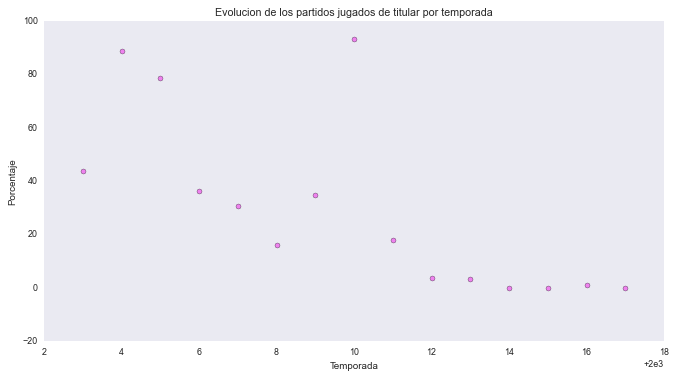

In [420]:
sty.use("seaborn-paper")
pregunta3a = df["PORC_PART_TITULAR"].to_frame().reset_index()
pregunta3a.plot(kind='scatter', x='SEASON', y ='PORC_PART_TITULAR', color='violet',figsize=(10,5))
plt.title("Evolucion de los partidos jugados de titular por temporada")
plt.xlabel("Temporada")
plt.ylabel("Porcentaje");

Analizamos una temporada en especial, tomando la 2007, temporada en la cual fue elegido como el mejor sexto hombre.

In [353]:
pregunta3b = df_manu.groupby(["SEASON","START_POSITION"])["PTS"].count() 
pregunta3b = pregunta3b.to_frame()
pregunta3b = pregunta3b.rename(columns={"PTS" : "PARTIDOS"})
pregunta3b = pregunta3b.reset_index()
pregunta3b 

,SEASON,START_POSITION,PARTIDOS
0,2003,F,2
1,2003,G,36
2,2003,Supl,49
3,2004,G,89
4,2004,Supl,11
5,2005,G,67
6,2005,Supl,18
7,2006,G,36
8,2006,Supl,63
9,2007,G,29


In [345]:
type(pregunta3b)

pandas.core.frame.DataFrame

In [355]:
pregunta3b = pregunta3b.loc[pregunta3["SEASON"] == 2007]
pregunta3b

,SEASON,START_POSITION,PARTIDOS
9,2007,G,29
10,2007,Supl,66


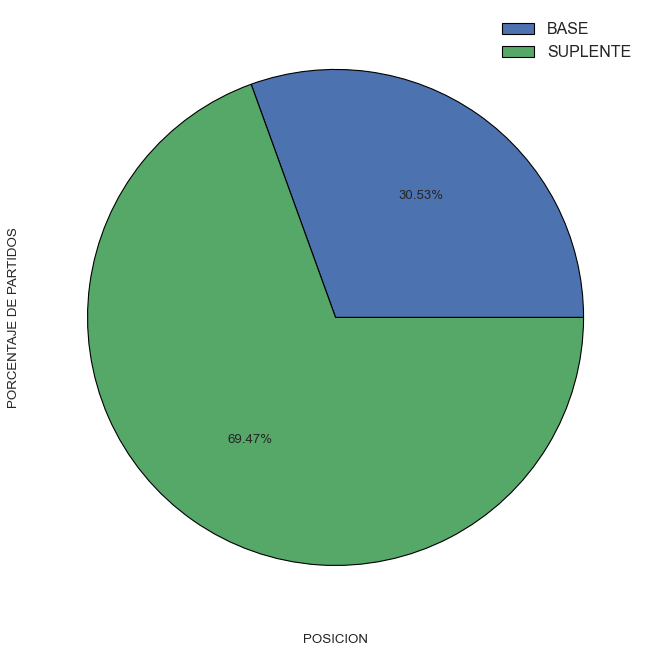

In [402]:
sty.use("seaborn-deep")

pregunta3b.plot.pie(x='START_POSITION', y='PARTIDOS',figsize=(10,10), autopct='%.2f%%', labels=None)
plt.legend(['BASE', 'SUPLENTE'],loc='best')
plt.xlabel("POSICION");
plt.ylabel("PORCENTAJE DE PARTIDOS");

#### 4 - Como evolucionaron sus estadisticas en los distintos rubros durante toda su carrera?

In [398]:
sty.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

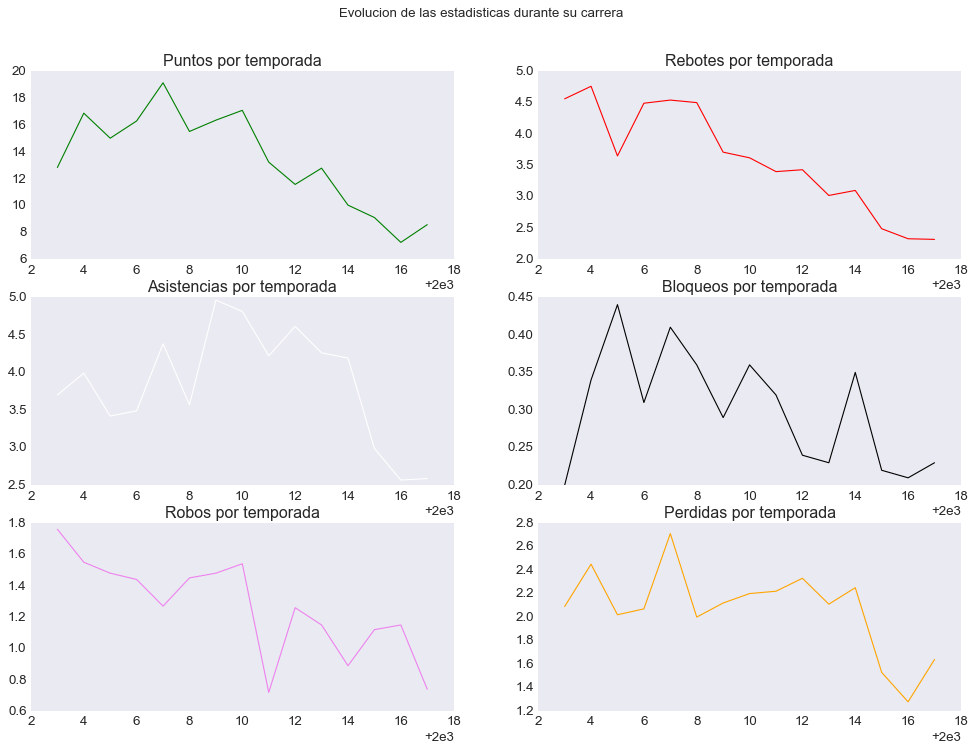

In [491]:
sty.use("seaborn-dark")

fig, axis = plt.subplots(3, 2,figsize=(15,10))

fig.suptitle('Evolucion de las estadisticas durante su carrera');

# primer plot
puntos = df["PROM_PTS_X_TEMP"]
axis[0, 0].plot(puntos, color = "green")
axis[0, 0].plot(kind ="bar")
axis[0, 0].set_title("Puntos por temporada")
  
# segundo plot
rebotes = df["PROM_REB_X_TEMP"]
axis[0, 1].plot(rebotes, color ="red")
axis[0, 1].set_title("Rebotes por temporada")
  
# tercer plot
asistencias = df["PROM_AST_X_TEMP"]
axis[1, 0].plot(asistencias, color ="white")
axis[1, 0].set_title("Asistencias por temporada")
  
# cuarto plot
tapas = df["PROM_TAPAS_X_TEMP"]
axis[1, 1].plot(tapas, color ="black")
axis[1, 1].set_title("Bloqueos por temporada")

# quinto plot
robos = df["PROM_ROBOS_X_TEMP"] 
axis[2, 0].plot(robos, color = "violet")
axis[2, 0].set_title("Robos por temporada")
  
# sexto plot
perdidas = df["PROM_PERD_X_TEMP"]
axis[2, 1].plot(perdidas, color = "orange")
axis[2, 1].set_title("Perdidas por temporada")

# combinamos y mostramos el grafico
plt.show()

In [490]:
df["PROM_PTS_X_TEMP"]

SEASON
2003    12.84
2004    16.88
2005    15.02
2006    16.30
2007    19.14
2008    15.52
2009    16.36
2010    17.09
2011    13.24
2012    11.58
2013    12.79
2014    10.04
2015     9.12
2016     7.27
2017     8.59
Name: PROM_PTS_X_TEMP, dtype: float64

#### 5 - Como fueron los resultados del equipo con el en cancha o sin su presencia?

In [442]:
df_SAS_con_Manu

,PART_JUGADOS,PART_GAN_LOCAL,PART_GAN_VIS,PART_PER_LOC,PART_PER_VIS
SEASON,,,,,
2003,87,35,24,9,19
2004,100,45,27,5,23
2005,85,32,27,11,15
2006,99,41,33,12,13
2007,95,38,24,7,26
2008,44,16,16,4,8
2009,89,29,22,15,23
2010,90,40,26,5,19
2011,50,24,15,4,7


In [489]:
df_estad_SAS

,PART_GAN_LOCAL,PART_GAN_VIS,PART_PER_LOC,PART_PER_VIS
SEASON,,,,
2003,37,29,14,20
2004,49,29,6,24
2005,39,32,13,19
2006,42,34,14,17
2007,43,25,8,28
2008,30,28,18,18
2009,33,24,16,25
2010,40,26,7,21
2011,35,26,6,15


In [465]:
dfprueba = df_SAS_con_Manu.reset_index()

In [466]:
dfprueba

,SEASON,PART_JUGADOS,PART_GAN_LOCAL,PART_GAN_VIS,PART_PER_LOC,PART_PER_VIS
0,2003,87,35,24,9,19
1,2004,100,45,27,5,23
2,2005,85,32,27,11,15
3,2006,99,41,33,12,13
4,2007,95,38,24,7,26
5,2008,44,16,16,4,8
6,2009,89,29,22,15,23
7,2010,90,40,26,5,19
8,2011,50,24,15,4,7
9,2012,84,36,25,7,16


### EXTRAS

#### Análisis Porcentaje de puntos por estación en toda su carrera

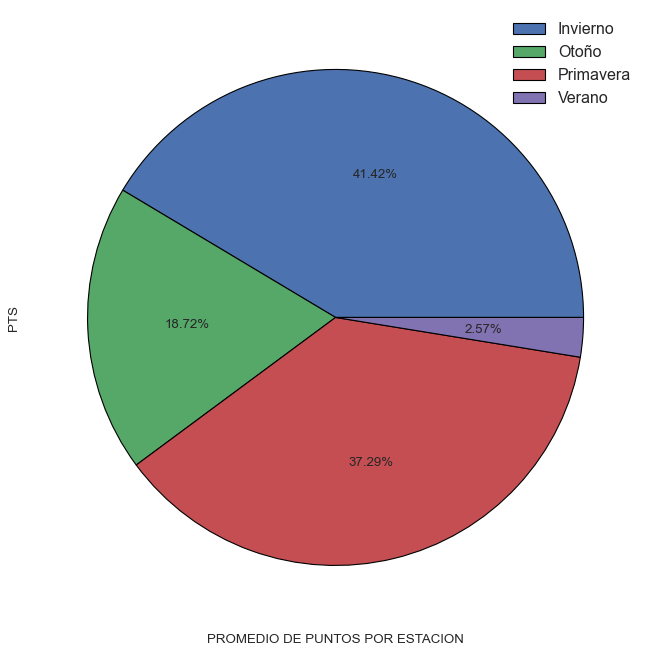

In [408]:
extras = df_manu.groupby(["Estacion"])["PTS"].sum()
extras = extras.to_frame().reset_index()
#extras = extras.loc[extras["SEASON"] == 2004]
extras.plot.pie(x='Estacion', y='PTS',figsize=(10,10), autopct='%.2f%%', labels=None)
plt.legend(['Invierno','Otoño', 'Primavera','Verano'],loc='best')
plt.xlabel("PORCENTAJE DE PUNTOS POR ESTACION");
plt.ylabel("PTS");

#### Análisis promedio de puntos por estación en toda su carrera

In [409]:
extras1 = df_manu.groupby(["Estacion"])["PTS"].sum() / df_manu.groupby(["Estacion"])["PTS"].count()
extras1

Estacion
Invierno     13.947896
Otoño        12.484127
Primavera    13.711160
Verano       15.962963
Name: PTS, dtype: float64

#### Análisis de puntos por estación por temporada en toda su carrera

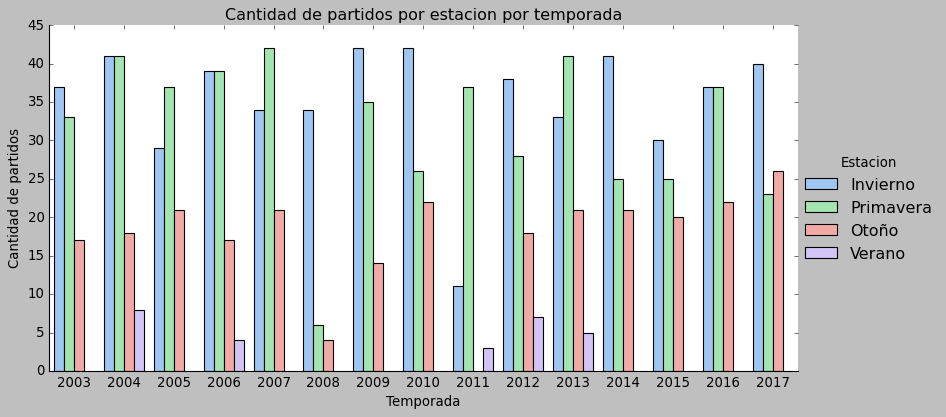

In [514]:
sty.use("seaborn-pastel")
sns.catplot(x="SEASON", hue = "Estacion", kind='count', data=df_manu, height=5, aspect=2, estimator=np.sum )
plt.xlabel("Temporada")
plt.ylabel("Cantidad de partidos")
plt.title("Cantidad de partidos por estacion por temporada");

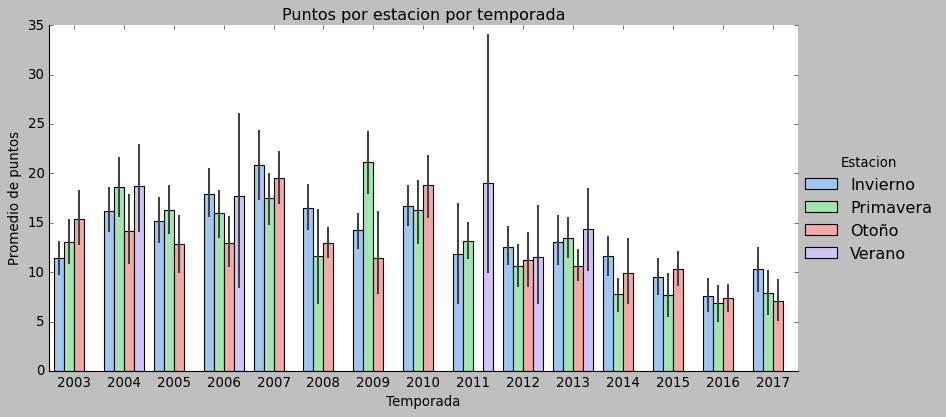

In [517]:
sty.use("seaborn-pastel")
sns.catplot(x="SEASON", y = "PTS", hue = "Estacion", kind='bar', data=df_manu, height=5, aspect=2, estimator=np.average )
plt.xlabel("Temporada")
plt.ylabel("Promedio de puntos")
plt.title("Puntos por estacion por temporada")
plt.savefig("Promedio de puntos_por_estacion_por_temporada.jpg");

## 5. Conclusiones <a id="conclusiones"></a>

De acuerdo al análisis de datos, en primer lugar podemos observar la excelente carrera desarrollada por Emanuel Ginobili durante todos sus años en la NBA, sin descuidar que llego a la misma en el año 2003 ya con 26 años y se mantuvo compitiendo en el máximo nivel hasta los 40 años, lo cual lo han logrado muy pocos jugadores en la historia de la NBA, consiguiendo a su vez titulos con San Antonio Spurs, premios individuales al mejor sexto hombre en la temporada 2007/2008 y participaciones en el All Stars Game. 
Como conclusiones especificas de los datos trabajados, podemos inferir que su carrera fue evolucionando y mejorando sus estadísticas en sus primeros años desde 2003 hasta 2009/2010 donde llego a tener numeros de una mega estrella, y lo cual se condice en parte con la edad ideal de un deportista de elite (desde los 26 a 30/31 años). Se puede observar que en algunas temporadas donde su participacion en el equipo fue fundamental, los porcentajes de partidos en los que ingreso de titular son bajos pero aun asi la cantidad de minutos disputados fueron creciendo, esto se debe a que para poder participar del premio al mejor sexto hombre, se debe cumplir un % de partidos jugados como suplente y no como titular, ademas de luego ser votado.




## 6. Referencias <a id="referencias"></a>

Links 

* https://es.wikipedia.org/wiki/Mejor_Sexto_Hombre_de_la_NBA
* https://www.kaggle.com/nathanlauga/nba-games